# Fourier

Señales armónicas relacionadas entre si en un periodo de N muestras

$$g_n = \sum_{k=0}^{N-1}C_k e^{\frac{-i2\pi k}{N}n}$$

Como encontrar $C_k$ con $g_n$

$$\begin{align*} 
S &= {\overrightarrow{^0S}, \overrightarrow{^1S}, \cdots, \overrightarrow{^{N-1}S}} \\
^nS_k &= e^{\frac{i2\pi k}{N}n}\\
\overrightarrow{g} &= \sum_{k=0}^{N-1}C_kk^\overrightarrow{S}
\end{align*}$$

Queremos ver si las señales en la base son ortogonales

$$\begin{align*} 
<\overrightarrow{^mS}, \overrightarrow{^nS}> &= 0 \quad n \neq m \\
<\overrightarrow{^mS}, \overrightarrow{^nS}> &= \sum_{k=0}^{N-1} {\overrightarrow{^mS}_k \overrightarrow{^nS}_k} = \sum_{k=0}^{N-1}{e^{\frac{i2\pi k}{N}n}e^{\frac{-i2\pi k}{N}m}} = \sum_{k=0}^{N-1}{e^{\frac{i2\pi k}{N}(n-m)}}
\end{align*}$$

Recordemos que la serie $\sum_{k=0}^{N-1}{a^k}$ converge a $\frac{1-a^N}{1-a}$, por lo que $<\overrightarrow{^mS}, \overrightarrow{^nS}> = \frac{1 - exp(i2\pi(n-m))}{i - exp(\frac{i2\pi}{N}(n-m))} = 0$ ya que $e^{i2\pi(n-m)} = 1$

$$\rightarrow C_k = \frac{<\overrightarrow{^kS}, \overrightarrow{g}>}{||\overrightarrow{^kS}||^2} = \frac{1}{N}\sum_{n=0}^{N-1}{g_n e^{\frac{i2\pi k}{N}n}} \Rightarrow Fourier$$

Transformamos $\overrightarrow{g} \rightarrow \overrightarrow{G}$ con Fourier. Podemos quitar elementos o pesarlos de manera distinta y se estaría aplicando un filtro.

Podemos aplicar lo mismo en 2D. Empezamos demostrando la ortogonalidad de 
$$\overrightarrow{^{l,k}S_{m,n}} = e^{\frac{i2\pi k}{N}n} e^{\frac{i2\pi l}{M}m}$$

Para esto queremos demostrar que $<\overrightarrow{^{l,k}S}, \overrightarrow{^{a,b}S}> = 0$ para $ l \neq a, \,\, k \neq b$

$$\begin{align*} 
<\overrightarrow{^{l,k}S}, \overrightarrow{^{a,b}S}> &= \sum_{p=0}^{M-1}\sum_{q=0}^{N-1}{^{l,k}S_{p,q}^{a,b}S_{p,q}} = \sum_{p=0}^{M-1}\sum_{q=0}^{N-1}{e^{\frac{i2\pi q}{N}l} e^{\frac{i2\pi p}{M}k} e^{\frac{-i2\pi q}{N}a} e^{\frac{-i2\pi p}{M}b}}\\
&= \sum_{p=0}^{M-1}\sum_{q=0}^{N-1}{e^{\frac{i2\pi q}{N}(l - a) } e^{\frac{i2\pi p}{M}(k-b)}} = \sum_{p=0}^{M-1}N e^{\frac{i2\pi p}{M}(k-b)} \sum_{q=0}^{N-1}{e^{\frac{i2\pi q}{N}(l - a) }}
\end{align*}$$

$$\rightarrow C_k = \frac{1}{NM} \sum_{n=0}^{N-1}\sum_{m=0}^{M-1}{g_{nm} e^{\frac{i2\pi k}{N}n}e^{\frac{i2\pi k}{M}m}}$$

Igual que en el caso 1D ambas partes de la sumatoria convergen a 0

## Señales continuas de banda limidata

Una señal de banda limitada es aquilla cuya composición en coeficientes de Fourier es una suma finita

Si $I$ es es el conjunto de componentes de la composición, los límites de esa banda son $F_{min}, F_{max}$ donde $|F_{min}|\leq|F_{k}| \qquad \forall k \in I \qquad |F_{max}|\geq|F_{k}| \qquad \forall k \in I$

Para calcular la trasnformada de Fourier en una imágen, tomamos el rango limitado donde el número de frecuencias está dado por la cantidad de pixeles de la imágen, si es una imágen cuadrada de $N \times N$ esta sería

$$F(k, l) = \frac{1}{N^2}\sum_{n=0}^{N-1}\sum_{m=0}^{N-1}f(k,l)e^{-i2\pi(\frac{kn}{N})(\frac{lm}{N})}$$

Donde $f(k,l)$ es la imágen en el dominio espacial. Como Fourier es separable podemos ver esto como dos transformadas

$$\begin{align*}
F(k, l) &= \frac{1}{N}\sum_{b=0}^{N-1} P(k,b)e^{-i2\pi(\frac{kb}{N})}\\
P(k, b) &= \frac{1}{N}\sum_{a=0}^{N-1} f(a,b)e^{-i2\pi(\frac{ka}{N})}
\end{align*}$$

Para una imágen de $32\times32$

/Users/jperalta/miniconda2/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


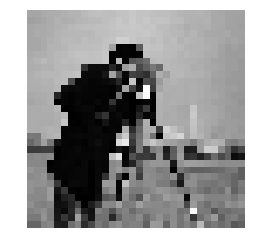

In [86]:
from skimage import io, data
from skimage.transform import rescale
import matplotlib.pyplot as plt

bw = rescale(data.camera(), 1.0 / 16.0)
plt.imshow(bw, cmap='gray')
plt.axis('off')
plt.show()

In [52]:
import numpy as np
from numba import jit

def fourier(img):
    coeficientes = np.zeros_like(img, dtype=complex)
    def get_coeficiente(i, j):
        c = 0
        for y in range(img.shape[0]):
            for x in range(img.shape[1]):
                c += img[y, x] * np.exp(-1j * 2 * np.pi *(i*y/img.shape[0] + j*x/img.shape[1]))
        return c
    for n in range(img.shape[0]):
        for m in range(img.shape[1]):
            coeficientes[n, m] = get_coeficiente(n,m)/(img.shape[0] * img.shape[1])
    return coeficientes

Para cada componente podemos calcular la imágen resultante

In [65]:
def inverseFourier(coeficientes, ncomp=None):
    if ncomp is None : ncomp = coeficientes.shape[0]
    def get_value(i, j):
        c = 0
        for y in range(ncomp):
            for x in range(ncomp):
                c += coeficientes[y, x] * np.exp(1j * 2 * np.pi *(i*y/img.shape[0] + j*x/img.shape[1]))
        return c
    
    img = np.zeros(coeficientes.shape)
    for a in range(coeficientes.shape[0]):
        for b in range(coeficientes.shape[1]):
            img[a, b] = get_value(a, b)
    return img

In [53]:
components = fourier(bw)

In [77]:
img = inverseFourier(components)
img1 = inverseFourier(components, 1)
img8 = inverseFourier(components, 8)
img16 = inverseFourier(components, 16)

/Users/jperalta/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


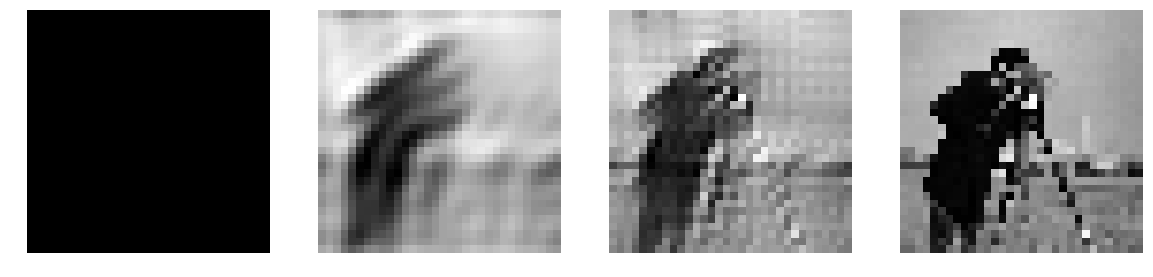

In [79]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,8))
ax1.imshow(img1, cmap='gray')
ax1.axis('off')
ax2.imshow(img8, cmap='gray')
ax2.axis('off')
ax3.imshow(img16, cmap='gray')
ax3.axis('off')
ax4.imshow(img, cmap='gray')
ax4.axis('off')
io.show()